In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
CustDist_WHCentral = pd.read_csv("CustDist_WHCentral.csv", sep=",", decimal=".")
del CustDist_WHCentral["Distances between Customers and Warehouse"]
CustDist_WHCentral_list = CustDist_WHCentral.values.tolist()

CustDist_WHCorner = pd.read_csv("CustDist_WHCorner.csv", sep=",", decimal=".")
del CustDist_WHCorner["Distances between Customers and Warehouse"]
CustDist_WHCorner_list = CustDist_WHCorner.values.tolist()

CustOrd = pd.read_csv("CustOrd.csv", sep=",", decimal=".")
del CustOrd["Customer"]
CustOrd_list = CustOrd.values.tolist()

In [11]:
#just to test 
import random

#creates the test list
test_list = list(range(1, 51))

#shuffles the list
for i in range(1000):
    index1 = random.randint(0,49)
    index2 = random.randint(0,49)
        
    val1 = test_list[index1]
    test_list[index1] = test_list[index2]
    test_list[index2] = val1

    
print(test_list)

[32, 31, 15, 10, 25, 33, 36, 6, 37, 14, 44, 47, 45, 30, 8, 49, 13, 42, 1, 27, 3, 29, 17, 34, 9, 39, 28, 48, 26, 21, 5, 16, 2, 40, 46, 41, 18, 22, 7, 23, 11, 35, 24, 4, 38, 50, 20, 12, 43, 19]


In [38]:
def evaluatecost(individual):
    total_distance = 0 
    load = 1000 
    
    #falta ele ir ter de descarregar na última cena (corrigir)
    for i in range(len(individual)):
        #doesnt have enough load 
        if(load < CustOrd_list[individual[i]][0]):
            #last location -> central
            total_distance = total_distance + CustDist_WHCentral_list[0][individual[i-1]]
            load = 1000
            
            #central -> next location
            total_distance = total_distance + CustDist_WHCentral_list[0][individual[i]]
            load = load - CustOrd_list[individual[i]][0]
            
        
        #last client
        if(i == (len(individual) - 1)):
            #last location -> next location
            total_distance = total_distance + CustDist_WHCentral_list[individual[i]][individual[i-1]]
            load = load - CustOrd_list[individual[i]][0]
            #next location -> warehouse
            total_distance = total_distance + CustDist_WHCentral_list[individual[i]][0]
        
        #first client
        if(i == 0):
            #warehouse -> next location
            total_distance = total_distance + CustDist_WHCentral_list[0][individual[i]]
            load = load - CustOrd_list[individual[i]][0]
        
        #has enough load 
        else: 
            #last location -> next location
            total_distance = total_distance + CustDist_WHCentral_list[individual[i]][individual[i-1]]
            load = load - CustOrd_list[individual[i]][0]
            
    return total_distance,

In [40]:
#evaluatecost(test_list)

lista = [30, 7, 20, 4, 17, 33, 36, 0, 10, 35, 46, 15, 34, 47, 48, 37, 31, 1, 22, 32, 28, 26, 13, 24, 29, 16, 43, 12, 25, 40, 27, 11, 39, 49, 18, 38, 45, 23, 9, 44, 6, 41, 19, 5, 21, 8, 50, 42, 2, 14, 3]

a = evaluatecost([30, 7, 20, 4, 17, 33, 36, 0, 10, 35, 46, 15, 34, 47, 48, 37, 31, 1, 22, 32, 28, 26, 13, 24, 29, 16, 43, 12, 25, 40, 27, 11, 39, 49, 18, 38, 45, 23, 9, 44, 6, 41, 19, 5, 21, 8, 50, 42, 2, 14, 3])
print(a)

custo = 0
for i in range(1, len(lista)):
    custo = custo + CustDist_WHCentral_list[lista[i]][lista[i-1]]
    #print(i, CustDist_WHCentral_list[lista[i]][lista[i-1]])


print(custo)

(1124,)
862


In [112]:
import random

import random
import numpy as np
from deap import base, creator, tools


def P1(Number_Customers, Population_Size, Number_of_Evaluations, seed):
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    ## permutation setup for individual,
    toolbox.register("indices", \
                     random.sample, \
                     range(Number_Customers), 
                     Number_Customers)

    toolbox.register("individual", \
                     tools.initIterate, \
                     creator.Individual, toolbox.indices)

    ## population setup,
    toolbox.register("population", \
                     tools.initRepeat, \
                     list, toolbox.individual)


    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.01)
    toolbox.register("evaluate", evaluatecost)
    toolbox.register("select", tools.selTournament, tournsize=4)
    
    
    random.seed(seed)

    # create an initial population of 300 individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=Population_Size)

    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 1.0, 0.1
    
    print("Start of evolution")
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    arr_mean = []
    arr_min = []
    # Begin the evolution
    while g < Number_of_Evaluations/ Population_Size:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < CXPB:
                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

        arr_mean.append(mean)
        arr_min.append(min(fits))
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    
    x_coordinate = [i+1 for i in range(len(arr_mean))]
    plt.plot(x_coordinate, arr_mean, label = "Average")
    plt.plot(x_coordinate, arr_min, label = "Min")
    plt.title("Min and Average Fitness over generations")
    plt.legend()
    plt.grid()
    plt.figure()

    return 

D:\Programas\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
D:\Programas\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Start of evolution
  Evaluated 100 individuals
-- Generation 1 --
  Evaluated 100 individuals
  Min 2385.0
  Max 2945.0
  Avg 2658.59
  Std 133.74663322865257
-- Generation 2 --
  Evaluated 100 individuals
  Min 2134.0
  Max 2805.0
  Avg 2533.87
  Std 125.5914531327681
-- Generation 3 --
  Evaluated 100 individuals
  Min 2120.0
  Max 2722.0
  Avg 2461.62
  Std 114.98719754825119
-- Generation 4 --
  Evaluated 100 individuals
  Min 2120.0
  Max 2659.0
  Avg 2386.62
  Std 121.30191919339188
-- Generation 5 --
  Evaluated 100 individuals
  Min 2120.0
  Max 2746.0
  Avg 2311.44
  Std 114.8333853894396
-- Generation 6 --
  Evaluated 100 individuals
  Min 2091.0
  Max 2496.0
  Avg 2249.51
  Std 94.99931526068674
-- Generation 7 --
  Evaluated 100 individuals
  Min 2062.0
  Max 2478.0
  Avg 2214.84
  Std 91.20676729278317
-- Generation 8 --
  Evaluated 100 individuals
  Min 2002.0
  Max 2354.0
  Avg 2159.35
  Std 70.20546631139945
-- Generation 9 --
  Evaluated 100 individuals
  Min 1960.0
  

  Evaluated 100 individuals
  Min 1101.0
  Max 1247.0
  Avg 1103.2
  Std 16.219741058354614
-- Generation 86 --
  Evaluated 100 individuals
  Min 1101.0
  Max 1487.0
  Avg 1114.5
  Std 59.43088422697434
-- Generation 87 --
  Evaluated 100 individuals
  Min 1101.0
  Max 1363.0
  Avg 1103.62
  Std 26.06867085219533
-- Generation 88 --
  Evaluated 100 individuals
  Min 1101.0
  Max 1403.0
  Avg 1106.34
  Std 34.02593716564201
-- Generation 89 --
  Evaluated 100 individuals
  Min 1101.0
  Max 1501.0
  Avg 1116.41
  Std 59.43283520075253
-- Generation 90 --
  Evaluated 100 individuals
  Min 1101.0
  Max 1328.0
  Avg 1106.5
  Std 29.38894349921349
-- Generation 91 --
  Evaluated 100 individuals
  Min 1101.0
  Max 1271.0
  Avg 1105.15
  Std 22.415340729058226
-- Generation 92 --
  Evaluated 100 individuals
  Min 1085.0
  Max 1281.0
  Avg 1104.05
  Std 20.681090396791255
-- Generation 93 --
  Evaluated 100 individuals
  Min 1085.0
  Max 1350.0
  Avg 1106.72
  Std 36.016962670383734
-- Generati

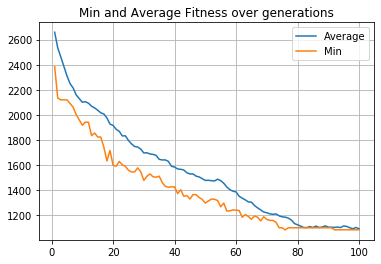

<Figure size 432x288 with 0 Axes>

In [113]:
P1(50, 100, 10000, 42)